Course: Stream Analytics
Team Size : At Most 2 students per team

November 30, 2024

Objective: Fetch, analyze and classify the data provided in the link given below:
https://tools.netsa.cert.org/silk/referencedata.html#
With the above data your task is to achieve following objectives:
• Retrieve the data stream that represents only the TCP traffic flowing through the network. To do this,
you should become familiar with the SiLK suite, a tool for analyzing the network and its components.
• Classify nodes based on the amount of TCP traffic they process. For instance, you can group nodes that
handle TCP traffic within a specific range, such as 10-100 packets per second, into one class. Use any
two algorithms, say Very Fast Decision Trees (VFDT) and On Demand Classification, discussed in the
lectures to perform this classification. During the demonstration, you should demonstrate the accuracy
of your classification by sending a query that retrieves data from at least two different ranges.
• Detect the anomaly in the fetched data. Anomalies are defined as the nodes which send large number of
TCP packets per sec, say 1K per sec. You are free to define your own threshold based on your observation
in the given data stream.
Methodology: Before you start you assignment, you should make yourself comfortable with different tools
involved in the SiLK suite. For this you should commence your learning process with the understanding basics
of it, such as its retrieval commands for a small dataset, etc. I would suggest to refer to the following book for
the same.
https://tools.netsa.cert.org/silk/analysis-handbook.pdf
Post this, you can proceed with the installation of the SiLK suite. For which you can refer to the following link
https://tools.netsa.cert.org/silk/silk-on-box-deb.html
For this assignment I would strongly suggest to use Ubuntu OS, with version ¿ 18.04, as most of the packages
are developed such that they are compatible to it.
Expected Output:
• Screen shot of terminal showing the summary of TCP packet in SiLK suite.
• Graphical representation of the classification and the anomaly detection. You can use python library, such
as pyplot, to plot the result. Furthermore, you are free to plot any other available tool to plot the answer.
SUBMISSION INSTRUCTIONS:
1. The assignment should be done in a group consisting of a maximum of TW O students.
2. The code should follow programming etiquette with appropriate comments.
3. Add a README file which includes a description of the code and gives detailed steps to compile and
run the code.
4. Name your files as config.csv/txt and outputfile.txt.
5. Zip all your code as a single file with the name rollno1-rollno2.tar.gz and upload it to Google class
room. Only one group member should upload the file.
6. Please note that you won’t be allowed to make any changes to the code once submitted. You can only
make changes to the topology file. Any changes to the code will result in 20% penalty of total marks. The
penalty will increase with the amount of changes done.

1. Understanding SiLK and Setting Up the Environment
Familiarize yourself with the SiLK suite using the provided resources:
SiLK Analysis Handbook.
SiLK Installation Guide for Ubuntu.
Install Ubuntu OS, preferably version 18.04 or higher.
Follow the installation steps for the SiLK suite and verify that it works using a small dataset.
2. Data Retrieval
Download the dataset provided in the link: SiLK Reference Data.
Use SiLK commands to filter the data stream to retrieve only the TCP traffic. Focus on commands like rwfilter and rwcut for filtering and viewing the data.
3. Classification of Nodes
Preprocessing the Data:
Parse the filtered TCP data to calculate the amount of TCP traffic handled by each node.
Choose Classification Algorithms:
Algorithm 1: Use Very Fast Decision Trees (VFDT) to classify nodes based on TCP traffic.
Algorithm 2: Use On-Demand Classification for comparison.
Group nodes into classes based on packet processing ranges (e.g., 10-100, 101-500 packets/sec).
Validate classification accuracy by querying data from at least two different ranges.
4. Anomaly Detection
Define a threshold for anomalies (e.g., nodes processing >1000 packets/sec).
Detect and highlight anomalies in the dataset using statistical methods or custom logic.
5. Visualization
Use Python libraries like matplotlib or seaborn to:
Plot graphs showing classification results.
Visualize anomalies in the data.

Install Required Dependencies:


`brew install gcc glib libpcap`

```
wget https://tools.netsa.cert.org/releases/silk-3.22.0.tar.gz
tar -xzf silk-3.22.0.tar.gz
cd silk-3.22.0
./configure --enable-ipv6 --prefix=/usr/local
make
sudo make install
```


Silk Conf. create silk.conf



```
probe tcp-probe
    type netflow-v5
    protocol tcp
    listen-on-port 18000
end probe

group all
    probes tcp-probe
end group

sensor my-sensor
    description "Example SiLK sensor"
    group all
end sensor

class in
    sensors my-sensor
end class

class out
    sensors my-sensor
end class

```



Extract Data with SiLK Commands
Filter TCP Traffic: Use rwfilter to extract only TCP traffic:

```
rwfilter --type=in,inweb --protocol=6 --pass=stdout /Users/yourname/silk/*.rw > tcp_traffic.rwf
```
Format and Export as CSV: Use rwcut to extract the desired fields and export the data as CSV:

```
rwcut --fields=sip,dip,packets,stime --output-format=csv tcp_traffic.rwf > tcp_traffic.csv
```


In [1]:
%pip install pandas
%pip install scikit-learn
%pip install seaborn
%pip install matplotlib
%pip install scikit-multiflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
          exec(compile('''
          ~~~~^^^^^^^^^^^^
          # This is <pip-setuptools-caller> -- a caller that pip uses to run setup.py
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
          ...<31 lines>...
          exec(compile(setup_py_code, filename, "exec"))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
          ''' % ('/private/var/folders/7p/lgqmtnt51dq5x6x0fjxmzfww0000gn/T/pip-install-ve1zmtnc/sciki

on-demand Classification

Low Traffic Nodes:
     SourceIP    DestinationIP  Packets                StartTime OnDemandClass
0  10.0.40.53  192.168.121.145        9  2015/06/02T13:39:31.779           Low
1  10.0.40.53   192.168.121.77        9  2015/06/02T13:39:44.244           Low
2  10.0.40.53   192.168.121.57        9  2015/06/02T13:39:44.369           Low
3  10.0.40.53  192.168.121.244        9  2015/06/02T13:39:51.966           Low
4  10.0.40.20   192.168.121.57       13  2015/06/02T13:39:54.712           Low
Medium Traffic Nodes:
           SourceIP  DestinationIP  Packets                StartTime  \
1434     10.0.40.50  192.168.40.50      102  2015/06/02T13:47:20.386   
1610     10.0.50.17  192.168.40.20      271  2015/06/02T13:49:18.755   
1835     10.0.40.50  192.168.40.50      110  2015/06/02T13:52:25.262   
1883     10.0.50.22  192.168.40.20      271  2015/06/02T13:52:35.208   
9822  192.168.40.20     10.0.50.17      235  2015/06/02T13:49:18.755   

     OnDemandClass  
1434        Medium  
1610      

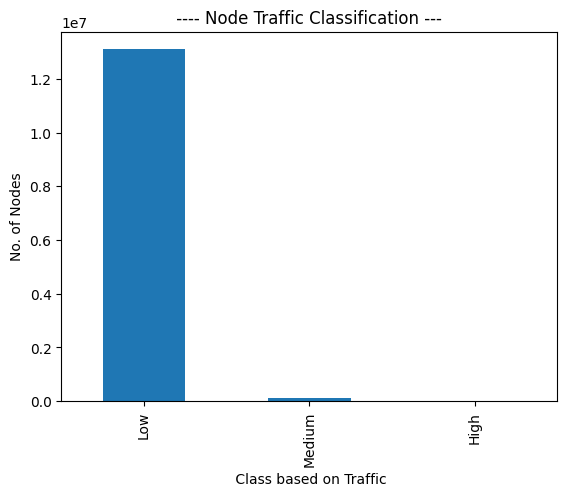

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# Load data
data = pd.read_csv("tcp_data.csv", names=["SourceIP", "DestinationIP", "Packets", "StartTime"])

# On-demand classification using a simple custom classifier
class OnDemandClassifier:
    def classify(self, packets):
        if packets <= 100:
            return "Low"
        elif 101 <= packets <= 1000:
            return "Medium"
        else:
            return "High"

# Apply on-demand classification
classifier = OnDemandClassifier()
data['OnDemandClass'] = data['Packets'].apply(classifier.classify)

# Demonstrate query functionality
low_traffic_nodes = data[data['OnDemandClass'] == "Low"]
print(f"Low Traffic Nodes:\n{low_traffic_nodes.head()}")

medium_traffic_nodes = data[data['OnDemandClass'] == "Medium"]
print(f"Medium Traffic Nodes:\n{medium_traffic_nodes.head()}")


# Plot classification distribution
traffic_counts = data["OnDemandClass"].value_counts()
traffic_counts.plot(kind="bar")
plt.title(" ---- Node Traffic Classification --- ")
plt.xlabel(" Class based on Traffic")
plt.ylabel("No. of Nodes")
plt.show()

***vfdt_implemetation***.  ( We have used river in the below code)

In [6]:
# replaced with river
from skmultiflow.trees import HoeffdingTree
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv("tcp_data.csv", names=["SourceIP", "DestinationIP", "Packets", "StartTime"])

# Define classification thresholds
def classify_traffic(packets):
    if packets <= 100:
        return 0  # Class 0: Low traffic
    elif 101 <= packets <= 1000:
        return 1  # Class 1: Medium traffic
    else:
        return 2  # Class 2: High traffic

# Apply classification
data["TrafficClass"] = data["Packets"].apply(classify_traffic)

# Prepare data for VFDT
X = data[["Packets"]].values  # Features: Packets
y = data["TrafficClass"].values  # Target: TrafficClass

# Split data into training and test sets
np.random.seed(42)
shuffle_indices = np.random.permutation(len(X))
X, y = X[shuffle_indices], y[shuffle_indices]
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Initialize VFDT model
vfdt = HoeffdingTree()

# Train the model
for i in range(len(X_train)):
    vfdt.partial_fit([X_train[i]], [y_train[i]], classes=[0, 1, 2])

# Test the model
y_pred = []
for i in range(len(X_test)):
    prediction = vfdt.predict([X_test[i]])
    y_pred.append(prediction[0])

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"VFDT Classification Accuracy: {accuracy * 100:.2f}%")

# Save predictions
output = pd.DataFrame({"Packets": X_test.flatten(), "TrueClass": y_test, "PredictedClass": y_pred})
output.to_csv("vfdt_predictions.csv", index=False)

# Query for specific ranges
def query_range(data, min_packets, max_packets):
    return data[(data["Packets"] >= min_packets) & (data["Packets"] <= max_packets)]

range1 = query_range(output, 10, 100)
range2 = query_range(output, 500, 1000)

print("\nQuery Results for 10-100 Packets:")
print(range1.head())
print("\nQuery Results for 500-1000 Packets:")
print(range2.head())

ModuleNotFoundError: No module named 'skmultiflow'

In [7]:
%pip install river

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 495.3 kB/s eta 0:00:001m359.3 kB/s eta 0:00:03
Note: you may need to restart the kernel to use updated packages.


In [10]:
from river import tree
from river import metrics
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv("tcp_data.csv", names=["SourceIP", "DestinationIP", "Packets", "StartTime"])

# Define classification thresholds
def classify_traffic(packets):
    if packets <= 100:
        return 0  # Class 0: Low traffic
    elif 101 <= packets <= 1000:
        return 1  # Class 1: Medium traffic
    else:
        return 2  # Class 2: High traffic

# Apply classification
data["TrafficClass"] = data["Packets"].apply(classify_traffic)

# Prepare data for VFDT
X = data[["Packets"]].values  # Features: Packets
y = data["TrafficClass"].values  # Target: TrafficClass

# Split data into training and test sets
np.random.seed(42)
shuffle_indices = np.random.permutation(len(X))
X, y = X[shuffle_indices], y[shuffle_indices]
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Initialize VFDT model and metric
vfdt = tree.HoeffdingTreeClassifier()
metric = metrics.Accuracy()  # Initialize the metric

# Train the model
print("Training the model...")
for x, target in zip(X_train, y_train):
    x_dict = {"Packets": x[0]}  # Convert to River's format
    vfdt.learn_one(x_dict, target)

# Test the model
print("Testing the model...")
y_pred = []
for x, target in zip(X_test, y_test):
    x_dict = {"Packets": x[0]}
    prediction = vfdt.predict_one(x_dict)
    y_pred.append(prediction)
    metric.update(target, prediction)  # Don't reassign metric

# Get final accuracy
accuracy = metric.get()
print(f"VFDT Classification Accuracy: {accuracy * 100:.2f}%")

# Save predictions
output = pd.DataFrame({
    "Packets": X_test.flatten(),
    "TrueClass": y_test,
    "PredictedClass": y_pred
})
output.to_csv("vfdt_predictions_river.csv", index=False)

# Query for specific ranges
def query_range(data, min_packets, max_packets):
    subset = data[(data["Packets"] >= min_packets) & (data["Packets"] <= max_packets)]
    if len(subset) == 0:
        print(f"No records found in range {min_packets}-{max_packets}")
    return subset

# Analyze results for specific ranges
range1 = query_range(output, 10, 100)
range2 = query_range(output, 500, 1000)

# Print results with additional statistics
print("\nQuery Results for 10-100 Packets:")
if not range1.empty:
    print(range1.head())
    print(f"Accuracy in this range: {(range1['TrueClass'] == range1['PredictedClass']).mean() * 100:.2f}%")
    print(f"Number of records: {len(range1)}")

print("\nQuery Results for 500-1000 Packets:")
if not range2.empty:
    print(range2.head())
    print(f"Accuracy in this range: {(range2['TrueClass'] == range2['PredictedClass']).mean() * 100:.2f}%")
    print(f"Number of records: {len(range2)}")

Training the model...
Testing the model...
VFDT Classification Accuracy: 99.04%

Query Results for 10-100 Packets:
    Packets  TrueClass  PredictedClass
1        12          0               0
2        11          0               0
4        10          0               0
8        11          0               0
10       10          0               0
Accuracy in this range: 100.00%
Number of records: 691292

Query Results for 500-1000 Packets:
      Packets  TrueClass  PredictedClass
2145      937          1               0
3208      926          1               0
3484      681          1               0
3885      681          1               0
5292      708          1               0
Accuracy in this range: 0.00%
Number of records: 1339


**4. Anomaly Detection**

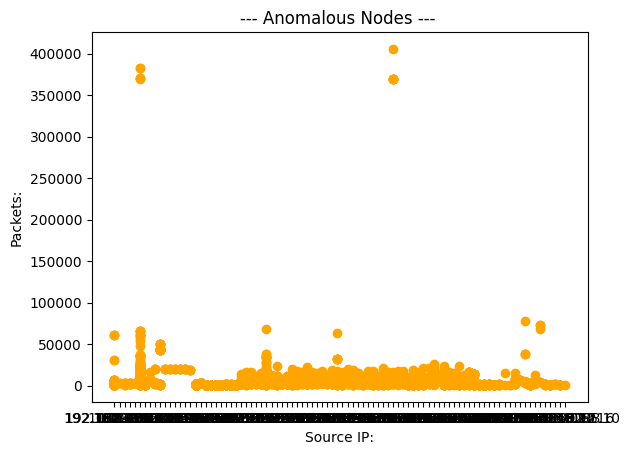

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv(
    "tcp_data.csv", names=["SourceIP", "DestinationIP", "Packets", "StartTime"])


anomalies = data[data["Packets"] > 1000]  # Detect anomalies
anomalies.to_csv("anomalies.csv", index=False)

# Plot anomalies
plt.scatter(anomalies["SourceIP"], anomalies["Packets"], color="orange")
plt.title("--- Anomalous Nodes --- ")
plt.xlabel("Source IP:")
plt.ylabel("Packets:")
plt.show()



In [ ]:
plt.scatter(anomalies['SourceIP'], anomalies['Packets'], color='red')
plt.title("Anomalous Nodes")
plt.xticks(rotation=45)
plt.xlabel("Source IP")
plt.ylabel("Packets")
plt.savefig("anomaly_plot.png")
plt.show()